In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('data/mycar.xls', sep=',')

In [5]:
df.head()

,Speed,Stopping_dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [29]:
X = df.iloc[:, -1].values.reshape(-1, 1)
y = df.iloc[:, -1].values.reshape(-1, 1)

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [32]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [33]:
y_pred = lr.predict(X_test)
y_pred

array([[40.],
       [48.],
       [32.],
       [42.],
       [14.],
       [34.],
       [ 4.],
       [24.],
       [26.],
       [50.],
       [92.],
       [28.],
       [18.],
       [16.],
       [26.]])

In [34]:
y_happy = [4,20,110,15,23]
y_happy_pred = [5,15,100,9,21]

In [35]:
from sklearn import metrics

In [36]:
MAE = metrics.mean_absolute_error(y_happy, y_happy_pred)
print(MAE)

4.8


In [38]:
MSE = metrics.mean_squared_error(y_happy, y_happy_pred)
print(MSE)

33.2


In [39]:
R_2 = metrics.r2_score(y_happy, y_happy_pred)
print(R_2)

0.9774247946472284


In [40]:
f = [2, 3, -1, 4]
f_pred = [1, 3, 2, 5]

In [41]:
MSE_f = metrics.mean_squared_error(f, f_pred)
print(MSE_f)

2.75


In [43]:
R2_f = metrics.r2_score(f, f_pred)
print(R2_f)

0.2142857142857143


## Preprocessing

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [196]:
data = pd.read_csv('data/asset-v1_Skillfactory+MLO-WEEKLY-2+14APR2020+type@asset+block@data_flats2.xls', sep=';')
data.head()

,id,full_sq,life_sq,floor,preschool_education_centers_raion,school_education_centers_raion,school_education_centers_top_20_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,...,shopping_centers_raion,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,mkad_km,bulvar_ring_km,kremlin_km,price_doc
0,1,43,27.0,4.0,5,5,0,0,7,3,...,16,1.131260,0.145700,0.177975,2.158587,0.600973,1.422391,13.675657,15.156211,5850000
1,2,34,19.0,3.0,5,8,0,0,6,1,...,3,0.635053,0.147754,0.273345,0.550690,0.065321,9.503405,8.132640,8.698054,6000000
2,3,43,29.0,2.0,4,7,0,0,5,1,...,0,1.445960,0.049102,0.158072,0.374848,0.453172,5.604800,8.054252,9.067885,5700000
3,4,89,50.0,9.0,9,10,0,0,17,6,...,11,0.963802,0.179441,0.236455,0.078090,0.106125,2.677824,18.309433,19.487005,13100000
4,5,77,77.0,4.0,7,9,0,2,25,2,...,10,0.688859,0.247901,0.376838,0.258289,0.236214,11.616653,0.787593,2.578671,16331452


In [197]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30469 entries, 0 to 30468
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     30469 non-null  int64  
 1   full_sq                                30469 non-null  int64  
 2   life_sq                                24086 non-null  float64
 3   floor                                  30302 non-null  float64
 4   preschool_education_centers_raion      30469 non-null  int64  
 5   school_education_centers_raion         30469 non-null  int64  
 6   school_education_centers_top_20_raion  30469 non-null  int64  
 7   university_top_20_raion                30469 non-null  int64  
 8   sport_objects_raion                    30469 non-null  int64  
 9   additional_education_raion             30469 non-null  int64  
 10  culture_objects_top_25_raion           30469 non-null  int64  
 11  sh

In [198]:
data.isnull().sum()

id                                          0
full_sq                                     0
life_sq                                  6383
floor                                     167
preschool_education_centers_raion           0
school_education_centers_raion              0
school_education_centers_top_20_raion       0
university_top_20_raion                     0
sport_objects_raion                         0
additional_education_raion                  0
culture_objects_top_25_raion                0
shopping_centers_raion                      0
metro_km_walk                              25
kindergarten_km                             0
school_km                                   0
park_km                                     0
green_zone_km                               0
mkad_km                                     0
bulvar_ring_km                              0
kremlin_km                                  0
price_doc                                   0
dtype: int64

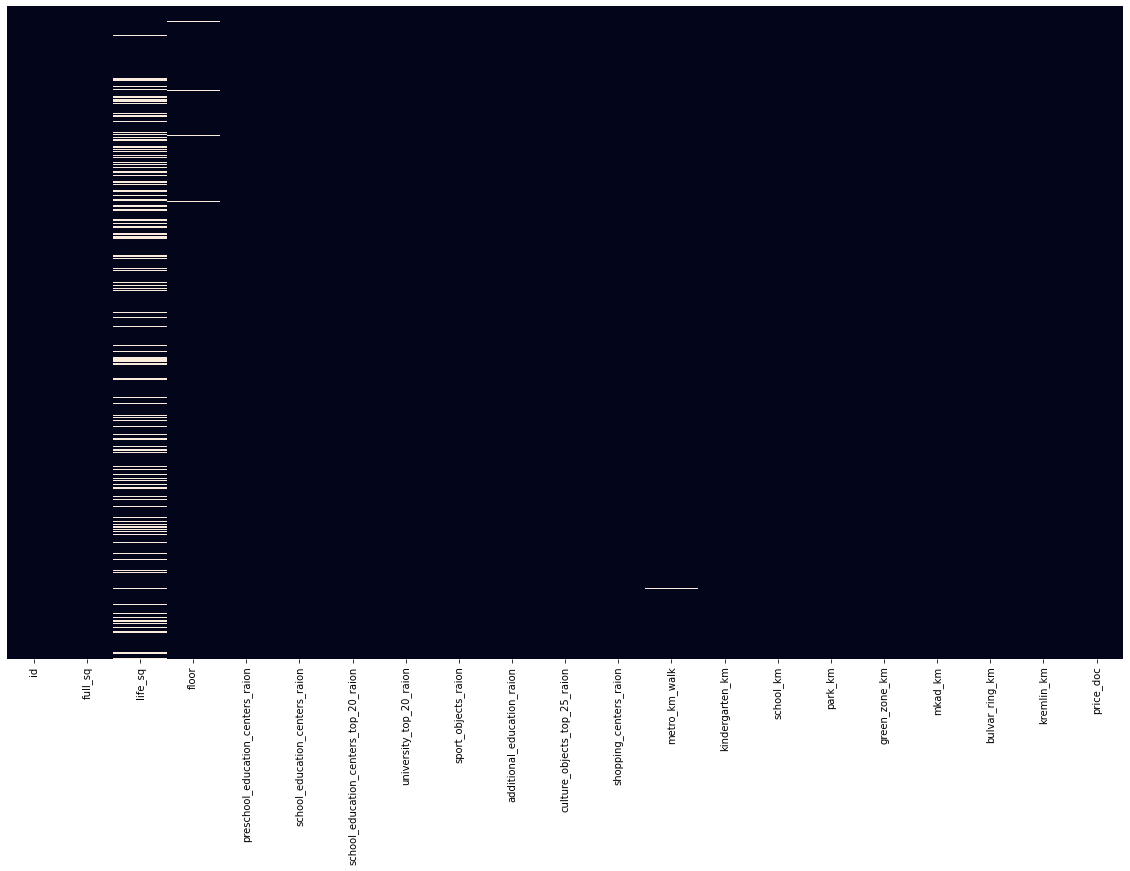

In [199]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(data.isna(), yticklabels=False, cbar=False);

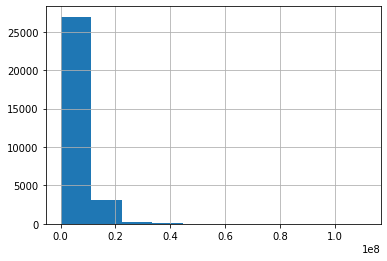

In [200]:
data.price_doc.hist();

<AxesSubplot:>

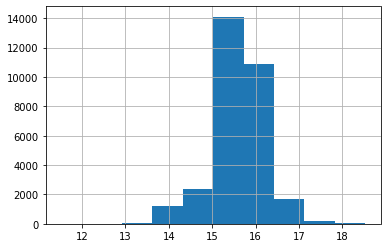

In [201]:
data.price_doc = data.price_doc.apply(lambda w: np.log(w + 1))
data.price_doc.hist()

<AxesSubplot:>

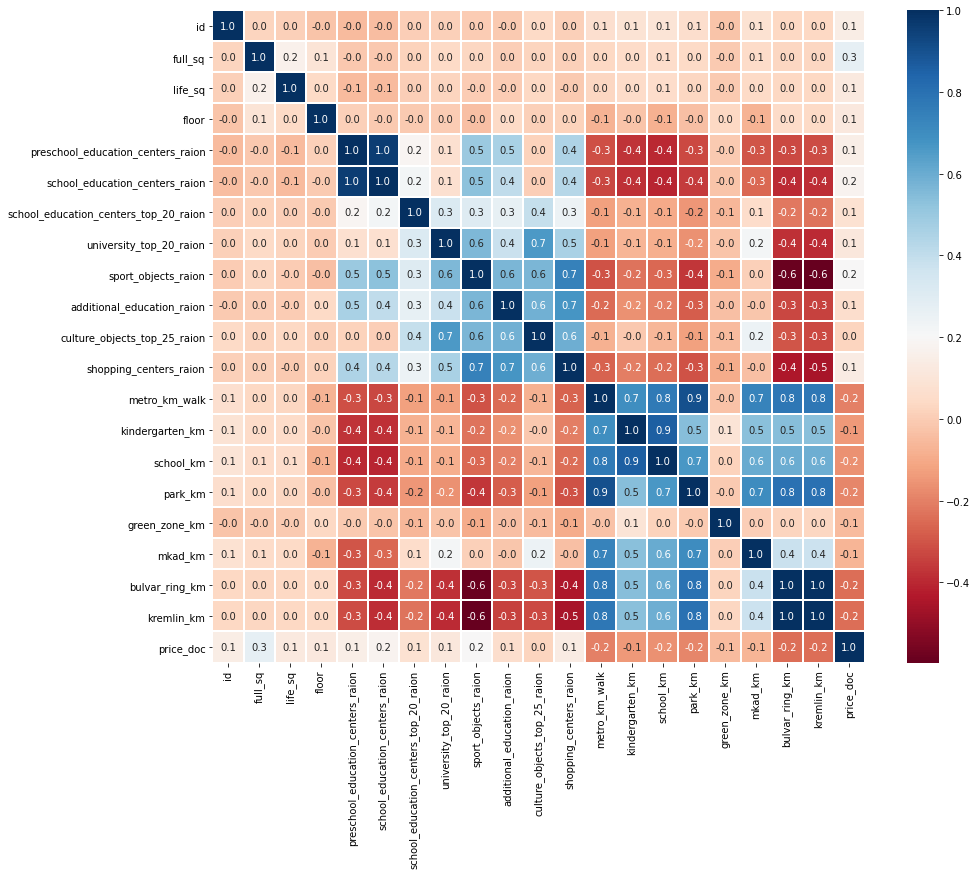

In [202]:
fix = plt.figure(figsize=(15, 12))
sns.heatmap(data.corr(), annot=True, square=True, fmt=".1f", linewidths=0.1, cmap="RdBu")

In [203]:
data.drop(['id', 'life_sq', 'preschool_education_centers_raion', 'kindergarten_km', 'park_km', 'kremlin_km'], axis=1, inplace=True)
data.dropna(inplace=True)

In [204]:
data.columns

Index(['full_sq', 'floor', 'school_education_centers_raion',
       'school_education_centers_top_20_raion', 'university_top_20_raion',
       'sport_objects_raion', 'additional_education_raion',
       'culture_objects_top_25_raion', 'shopping_centers_raion',
       'metro_km_walk', 'school_km', 'green_zone_km', 'mkad_km',
       'bulvar_ring_km', 'price_doc'],
      dtype='object')

In [205]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [206]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

In [207]:
from sklearn.preprocessing import RobustScaler

In [208]:
rs = RobustScaler()
X_train_transformed = rs.fit_transform(X_train)
X_test_transformed = rs.fit_transform(X_test)

In [209]:
lr_model = LinearRegression()
lr_model.fit(X_train_transformed, y_train)

LinearRegression()

In [210]:
y_pred = lr_model.predict(X_test_transformed)

In [211]:
from sklearn.metrics import mean_squared_error

In [213]:
round(mean_squared_error(np.exp(y_test) - 1, np.exp(y_pred) - 1), 0)

16647931507747.0